<a href="https://colab.research.google.com/github/Kevin-gram/Data-Preprocessing/blob/main/Kevin_Nyiringango_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Potato late blight and Early blight detection


## Student Name: Kevin Nyiringango

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

**Data Aggregation**
 - Kaggle Dataset: Potato Disease Dataset
 - Research Article : [Potato late blight](https://plantwiseplusknowledgebank.org/doi/epdf/10.1079/pwkb.20127801767)
 - Github sources: [PlantVillage-Dataset](https://github.com/spMohanty/PlantVillage-Dataset)

**Folders dataset structure**

***Data Training***

 - late/: Images of leaves with late blight.
 - early/: Images of leaves with early blight.
 - healthy/: Images of healthy leaves.

***Data validation***

 - late/: Validation images of leaves with late blight.
 - early/: Validation images of leaves with early blight.
 - healthy/: Validation images of healthy leaves.


In [2]:
#insert code if necessaryfrom tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize pixel values
train_generator = datagen.flow_from_directory(
    "data/training",
    target_size=(64, 64),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
)

validation_generator = datagen.flow_from_directory(
    "data/validation",
    target_size=(64, 64),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
)

Found 96 images belonging to 4 classes.




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **Your answer for data transformation goes here **

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**


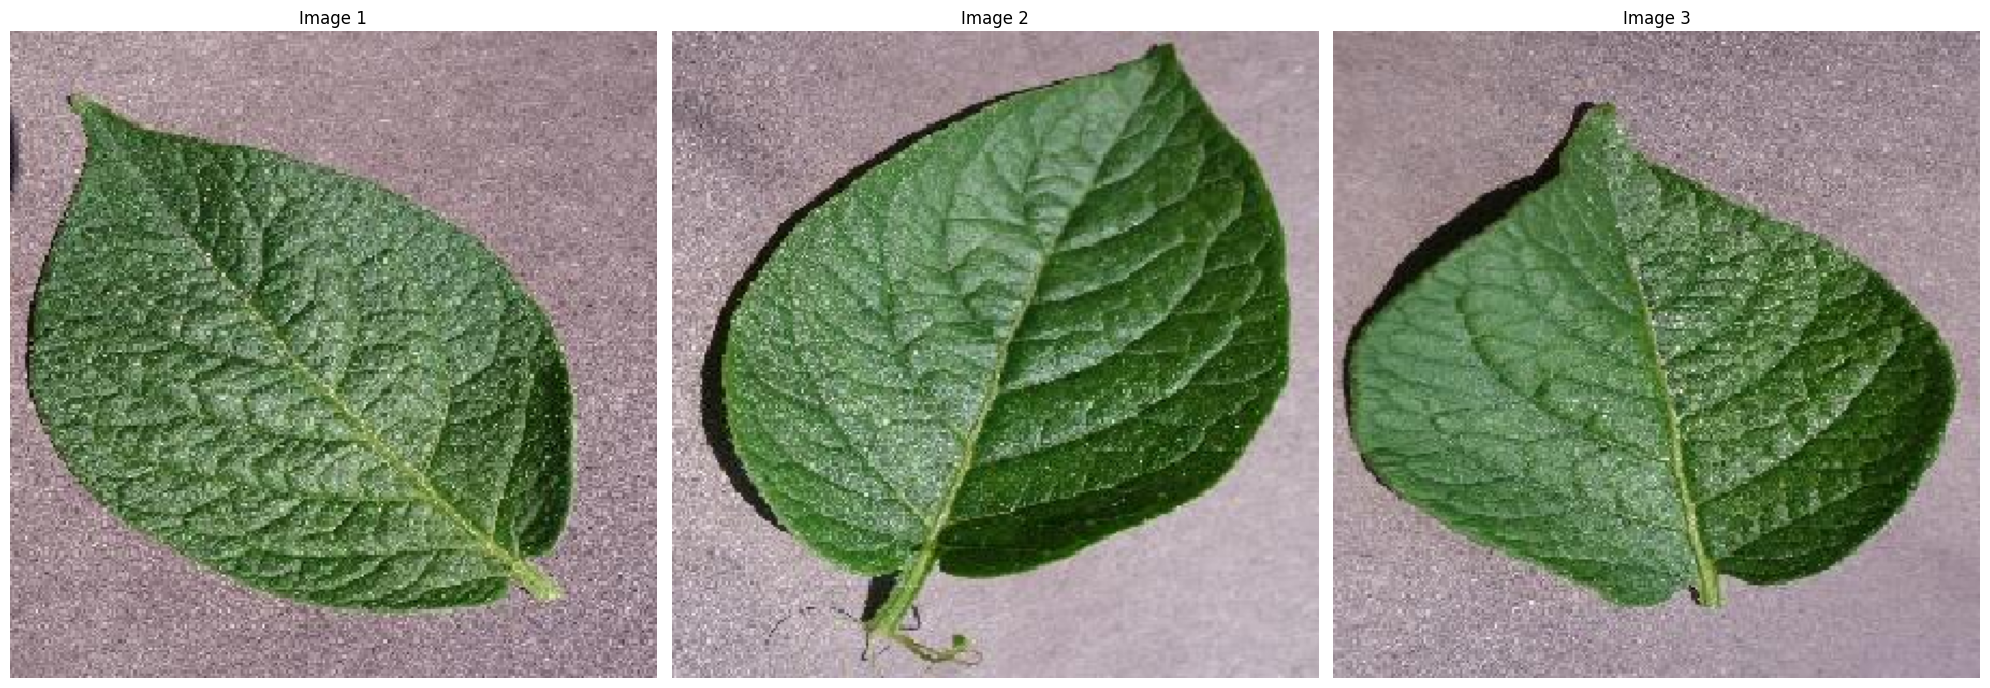

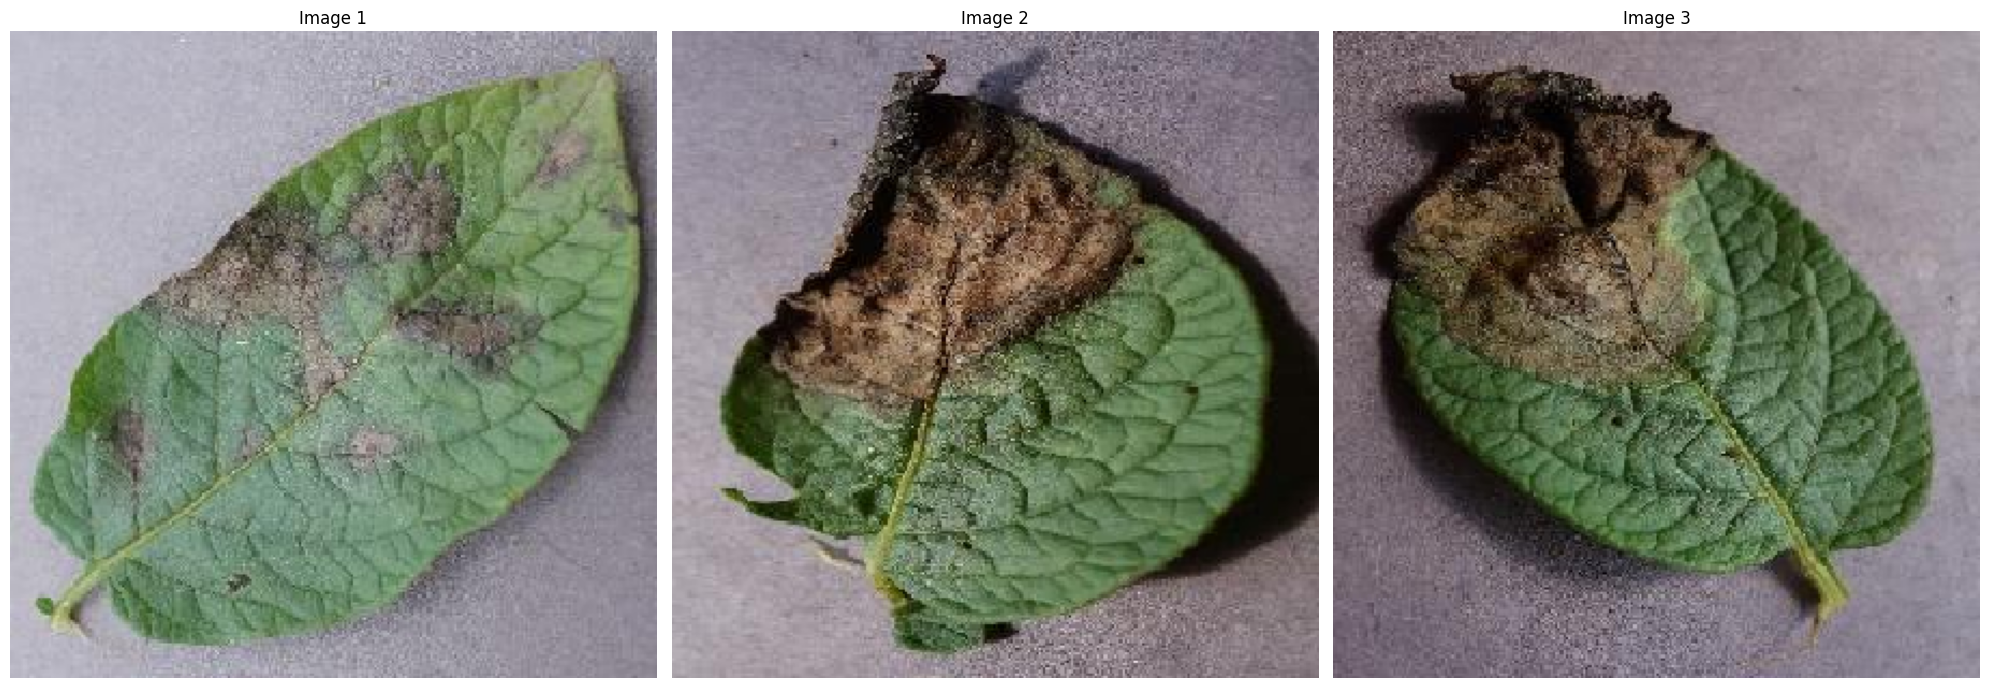

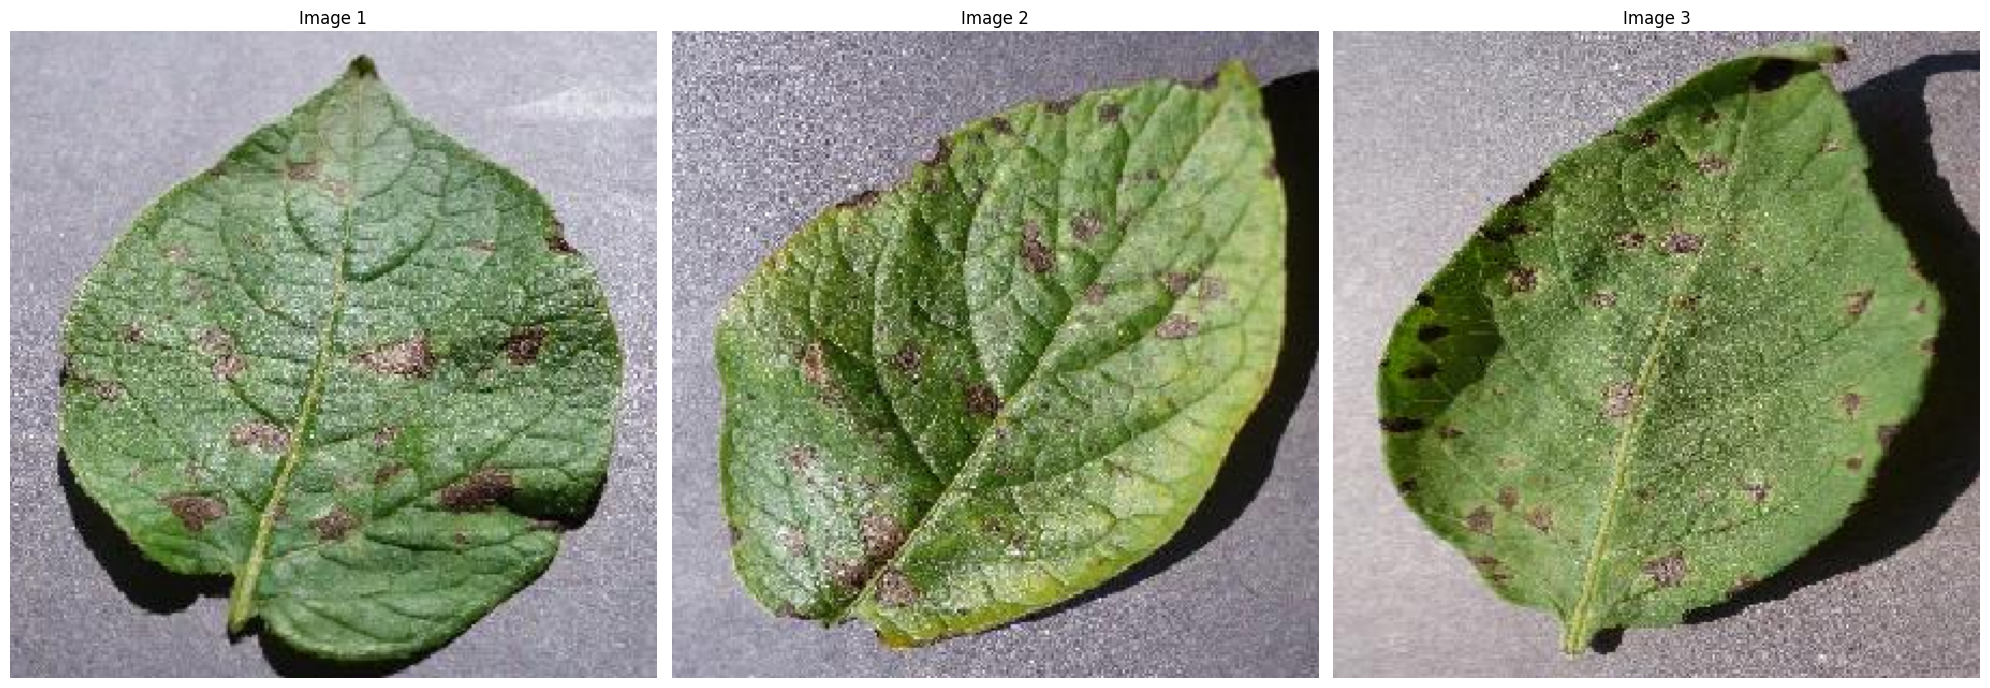

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import random
import os

def plot_images_from_path(path, num_images=3):
    images = os.listdir(path)
    plt.figure(figsize=(20, 20))

    random_images = random.sample(images, min(num_images, len(images)))

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(path, img_name)
        img = load_img(img_path, target_size=(300, 300))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"Image {i+1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Using the corrected folder names for your potato dataset
plot_images_from_path("data/training/Potato___healthy")  # Healthy
plot_images_from_path("data/training/Potato__Late_blight")  # Late Blight
plot_images_from_path("data/training/Potato___Early_blight")  # Early Blight




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Your answer for Hypothesis Testing goes here **

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

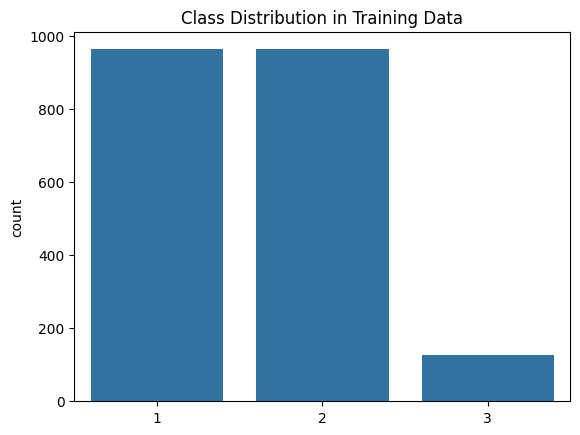

In [9]:
import seaborn as sns

sns.countplot(x=train_generator.classes)
plt.title("Class Distribution in Training Data")
plt.show()

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your
 working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


In [21]:
from PIL import Image
import os

# Categories for Potato dataset
categories = ["Potato___healthy", "Potato___Late_blight", "Potato___Early_blight"]

# Iterate over training and validation directories
for data_type in ["training", "validation"]:
    for category in categories:
        path = f"data/{data_type}/{category}"

        # Check if the folder exists before processing
        if os.path.exists(path):
            print(f"Processing folder: {path}")
            for file in os.listdir(path):
                file_path = os.path.join(path, file)

                # Check if it's a file (not a directory)
                if os.path.isfile(file_path):
                    try:
                        img = Image.open(file_path)  # Open the image
                        img.verify()  # Verify if the file is a valid image
                    except (IOError, SyntaxError):
                        print(f"Removing corrupted file: {file_path}")
                        os.remove(file_path)
        else:
            print(f"Folder not found: {path}")


Processing folder: data/training/Potato___healthy
Processing folder: data/training/Potato___Late_blight
Processing folder: data/training/Potato___Early_blight
Processing folder: data/validation/Potato___healthy
Processing folder: data/validation/Potato___Late_blight
Processing folder: data/validation/Potato___Early_blight


In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    "balanced", classes=np.unique(train_generator.classes), y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

In [23]:
datagen_augmented = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.